In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
playstore_df = pd.read_csv("googleplaystore.csv")

In [4]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
playstore_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
#handling the missing value with simle imputer 

from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy='median')
playstore_df['Rating'] = median_imputer.fit_transform(playstore_df[['Rating']])


playstore_df['Type'] = playstore_df['Type'].fillna('Free')
playstore_df['Content Rating'] = playstore_df['Content Rating'].fillna('Everyone')
playstore_df = playstore_df.drop(columns=['Current Ver', 'Android Ver'])




In [7]:
playstore_df.drop_duplicates(inplace=True)

# Data shape after removing duplicates
print("Dataset Shape after removing duplicates:", playstore_df.shape)

Dataset Shape after removing duplicates: (10358, 11)


In [8]:

playstore_df.describe()

,Rating
count,10358.000000
mean,4.205165
std,0.506868
min,1.000000
25%,4.100000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10358 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10358 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
dtypes: float64(1), object(10)
memory usage: 971.1+ KB


In [10]:
playstore_df.shape

(10358, 11)

In [11]:
# Get unique categories
unique_categories = playstore_df['Category'].unique()
print(unique_categories)


['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


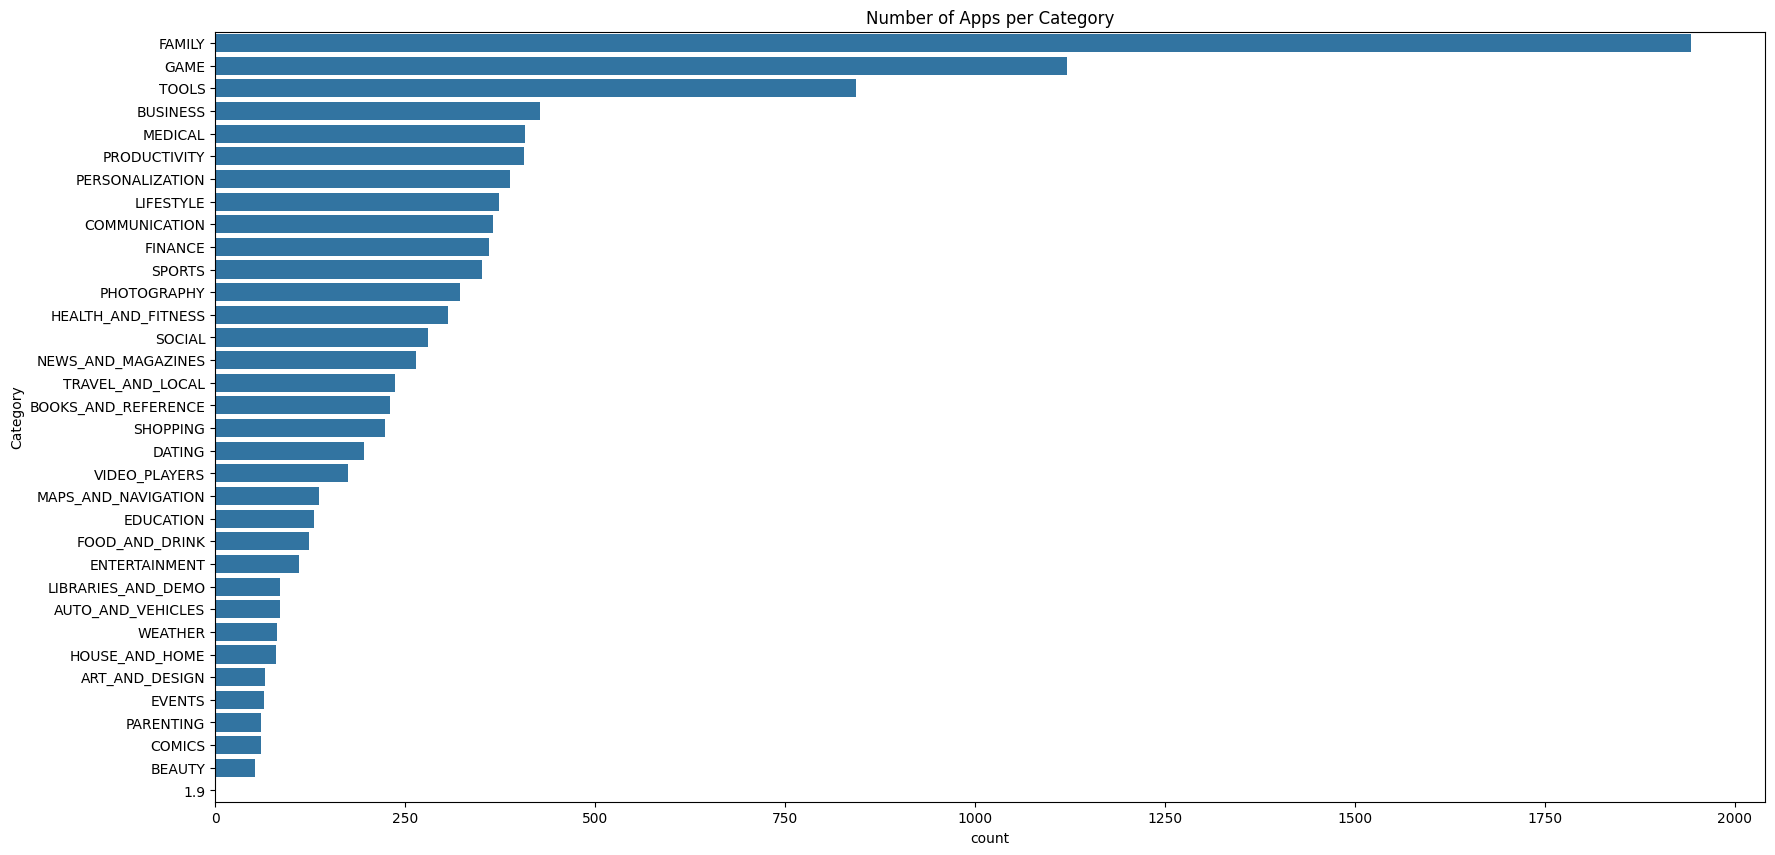

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(y='Category', data=playstore_df, order=playstore_df['Category'].value_counts().index)
plt.title('Number of Apps per Category')
plt.show()

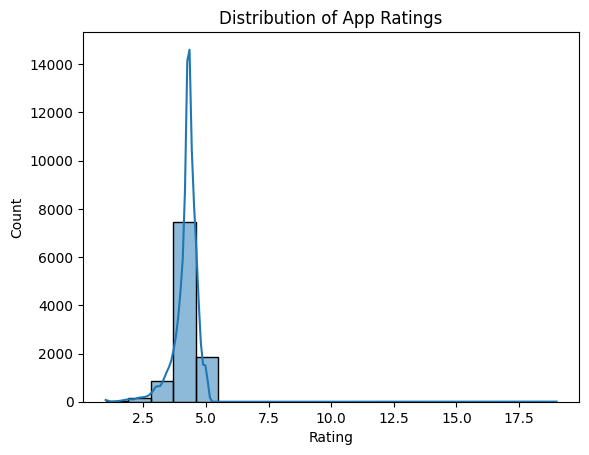

In [13]:
sns.histplot(playstore_df['Rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.show()

# feature engineering

In [14]:
# 1. Encode 'Type' (Free / Paid) to binary

playstore_df['Is_Paid'] = playstore_df['Type'].apply(lambda x: 1 if x == 'Paid' else 0)


In [15]:
# 2. Convert 'Installs' to numeric

playstore_df['Installs'] = playstore_df['Installs'].str.replace('[+,]', '', regex=True)
playstore_df['Installs'] = pd.to_numeric(playstore_df['Installs'], errors='coerce')

In [16]:
# 3. Extract price as numeric
# Remove '$' sign and convert

playstore_df['Price'] = playstore_df['Price'].str.replace('$', '', regex=False)
playstore_df['Price'] = pd.to_numeric(playstore_df['Price'], errors='coerce')

In [17]:
# 5. Encode 'Content Rating' using one-hot encoding or label encoding

playstore_df = pd.get_dummies(playstore_df, columns=['Content Rating'], drop_first=True)


In [18]:
# 6. Reviews as numeric
playstore_df['Reviews'] = pd.to_numeric(playstore_df['Reviews'], errors='coerce')


In [19]:
print(playstore_df.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size    Installs  Type  Price                     Genres  \
0     159.0   19M     10000.0  Free    0.0               Art & Design   
1     967.0   14M    500000.0  Free    0.0  Art & Design;Pretend Play   
2   87510.0  8.7M   5000000.0  Free    0.0               Art & Design   
3  215644.0   25M  50000000.0  Free    0.0               Art & Design   
4     967.0  2.8M    100000.0  Free    0.0    Art & Design;Creativity   

       Last Updated  Is_Paid  Content Rating_Everyone  \
0   January 7, 2018    

# Eda and featue engineering for the playstore_user_review data

In [20]:
reviews_df = pd.read_csv("googleplaystore_user_reviews.csv")

In [21]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [22]:
reviews_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [24]:
reviews_df['Translated_Review'].fillna('No review', inplace=True)


In [37]:
# Handling missing sentiment 

reviews_df = reviews_df[reviews_df['Sentiment'] != 'Unknown']



In [35]:
# Handling missing polarity/subjectivity by filling with default values

reviews_df['Sentiment_Polarity'].fillna(0.0, inplace=True)
reviews_df['Sentiment_Subjectivity'].fillna(0.0, inplace=True)

In [34]:
reviews_df.isnull().sum()


App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

# sentiment distribution

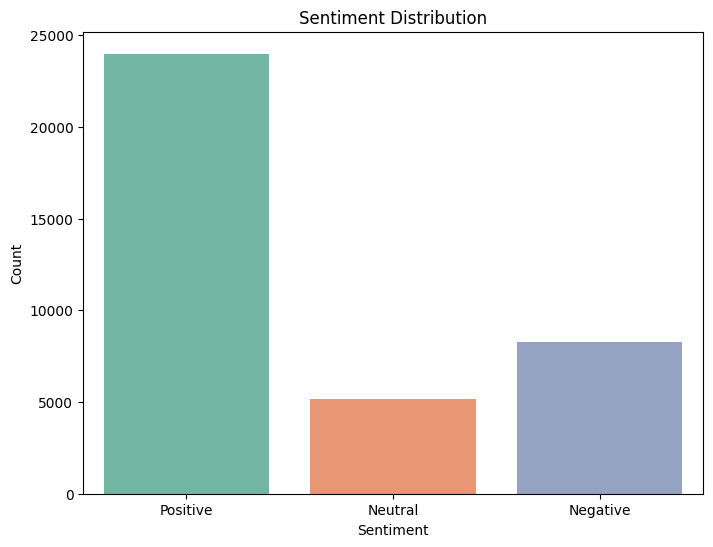

In [38]:
# Sentiment Label Distribution

plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=reviews_df, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

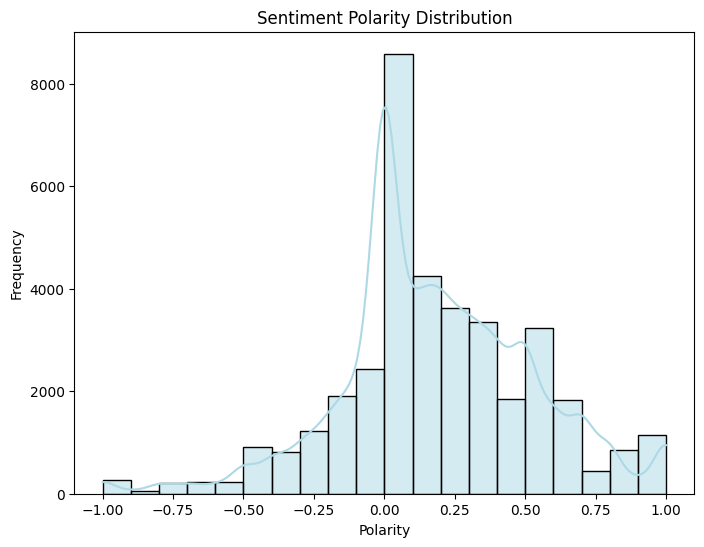

In [ ]:
# Sentiment Polarity Distribution

plt.figure(figsize=(8, 6))
sns.histplot(reviews_df['Sentiment_Polarity'], bins=20, color='lightblue', kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

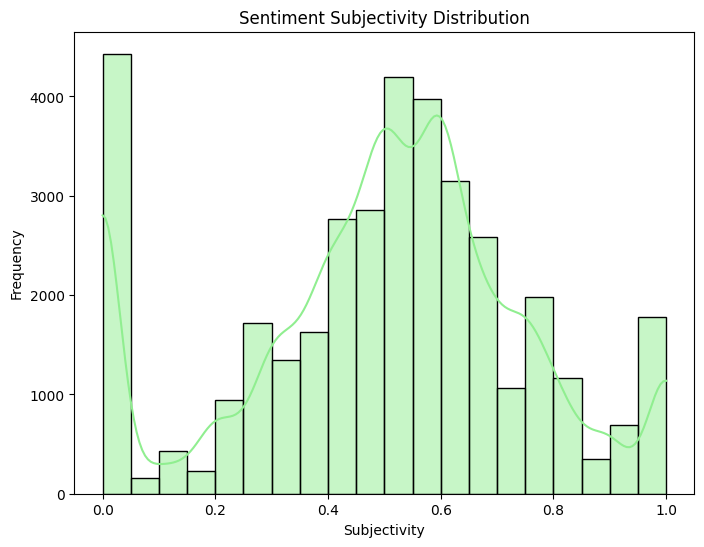

In [40]:
# Sentiment Subjectivity Distribution
plt.figure(figsize=(8, 6))
sns.histplot(reviews_df['Sentiment_Subjectivity'], bins=20, color='lightgreen', kde=True)
plt.title('Sentiment Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

In [41]:
# Create a new feature for Review Length (number of characters)

reviews_df['Review_Length'] = reviews_df['Translated_Review'].apply(len)

In [42]:
# Create a new feature for Word Count (number of words)
reviews_df['Word_Count'] = reviews_df['Translated_Review'].apply(lambda x: len(str(x).split()))


#  Review Length Analysis

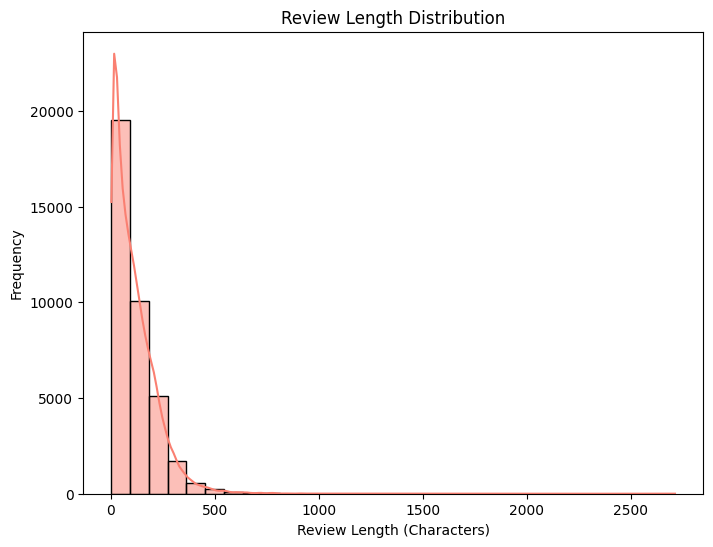

In [43]:

# Plot the distribution of Review Length
plt.figure(figsize=(8, 6))
sns.histplot(reviews_df['Review_Length'], bins=30, kde=True, color='salmon')
plt.title('Review Length Distribution')
plt.xlabel('Review Length (Characters)')
plt.ylabel('Frequency')
plt.show()

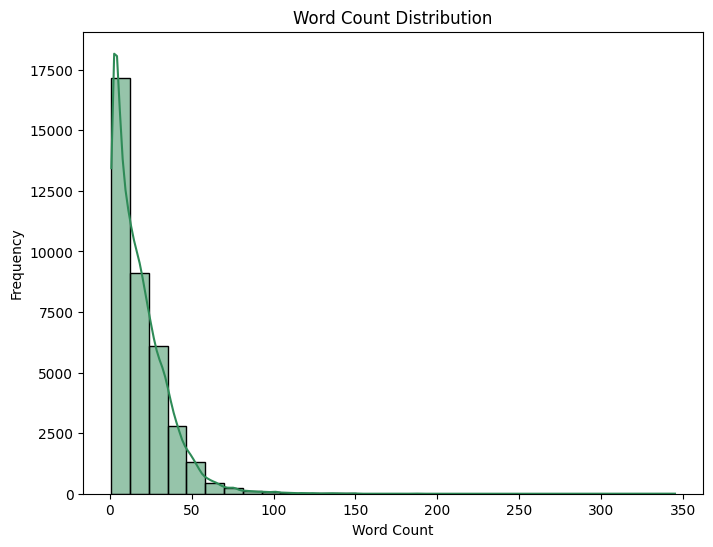

In [44]:
# Plot the distribution of Word Count
plt.figure(figsize=(8, 6))
sns.histplot(reviews_df['Word_Count'], bins=30, kde=True, color='seagreen')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Sentiment Polarity vs Subjectivity

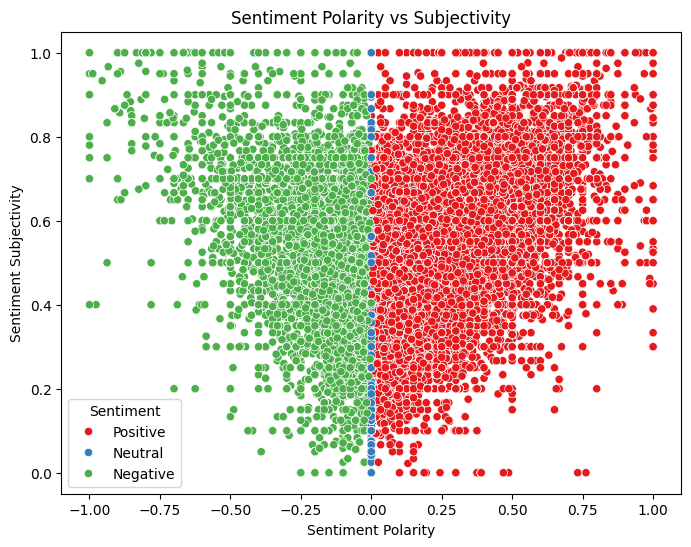

In [45]:
# Scatter plot of Sentiment Polarity vs Sentiment Subjectivity

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sentiment_Polarity', y='Sentiment_Subjectivity', data=reviews_df, hue='Sentiment', palette='Set1')
plt.title('Sentiment Polarity vs Subjectivity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Sentiment Subjectivity')
plt.show()

#  Feature Engineering (FE)

In [47]:
# Encode Sentiment as numerical values

sentiment_mapping = {'Negative': -1, 'Neutral': 0, 'Positive': 1, }
reviews_df['Sentiment_Label'] = reviews_df['Sentiment'].map(sentiment_mapping)

In [48]:
reviews_df[['Sentiment', 'Sentiment_Label']].head()

,Sentiment,Sentiment_Label
0,Positive,1
1,Positive,1
3,Positive,1
4,Positive,1
5,Positive,1


In [49]:
# Create a new feature 'Polarity_Binned' based on Sentiment Polarity

def polarity_bins(polarity):
    if polarity > 0.5:
        return 'Very Positive'
    elif polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    elif polarity > -0.5:
        return 'Negative'
    else:
        return 'Very Negative'

reviews_df['Polarity_Binned'] = reviews_df['Sentiment_Polarity'].apply(polarity_bins)

# Check the new feature
reviews_df[['Sentiment_Polarity', 'Polarity_Binned']].head()


,Sentiment_Polarity,Polarity_Binned
0,1.00,Very Positive
1,0.25,Positive
3,0.40,Positive
4,1.00,Very Positive
5,1.00,Very Positive


In [51]:
# Create a feature for Word Length Ratio
reviews_df['Word_Length_Ratio'] = reviews_df['Review_Length'] / reviews_df['Word_Count']


reviews_df[['Review_Length', 'Word_Count', 'Word_Length_Ratio']].head()


,Review_Length,Word_Count,Word_Length_Ratio
0,122,21,5.809524
1,47,7,6.714286
3,42,6,7.000000
4,12,3,4.000000
5,8,2,4.000000


In [62]:
playstore_merge_df = pd.merge(reviews_df, playstore_df, on='App', how='inner')


In [66]:
playstore_merge_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Review_Length,Word_Count,Sentiment_Label,Polarity_Binned,Word_Length_Ratio,...,Type,Price,Genres,Last Updated,Is_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,122,21,1,Very Positive,5.809524,...,Free,0.0,Health & Fitness,"February 17, 2017",0,False,True,False,False,False
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,47,7,1,Positive,6.714286,...,Free,0.0,Health & Fitness,"February 17, 2017",0,False,True,False,False,False
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,42,6,1,Positive,7.000000,...,Free,0.0,Health & Fitness,"February 17, 2017",0,False,True,False,False,False
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,12,3,1,Very Positive,4.000000,...,Free,0.0,Health & Fitness,"February 17, 2017",0,False,True,False,False,False
4,10 Best Foods for You,Best way,Positive,1.00,0.300000,8,2,1,Very Positive,4.000000,...,Free,0.0,Health & Fitness,"February 17, 2017",0,False,True,False,False,False


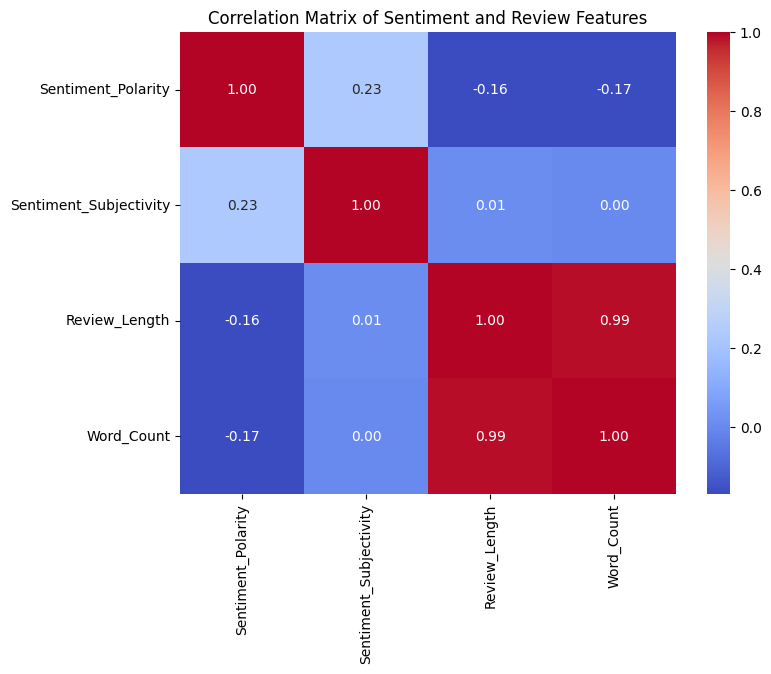

In [65]:


# Correlation between sentiment features and ratings

corr_matrix = playstore_merge_df[['Sentiment_Polarity', 'Sentiment_Subjectivity', 'Review_Length', 'Word_Count']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Sentiment and Review Features')
plt.show()
